# Feature of each clusters

In [2]:
library(fmsb)
library(tidyverse)

## Import data

### 6 Clusters results

In [3]:
umap_exp_6k = read.csv('../output_data/group/category/cluster_results/umap_exp_results_159r_all_fixlabel.csv',
                       row.names=1)
Hostile = rownames(umap_exp_6k%>%filter(cl_k6==5))
Familial = rownames(umap_exp_6k%>%filter(cl_k6==2))
Romantic = rownames(umap_exp_6k%>%filter(cl_k6==3))
Affiliative = rownames(umap_exp_6k%>%filter(cl_k6==1))
Transactional = rownames(umap_exp_6k%>%filter(cl_k6==4))
Power = rownames(umap_exp_6k%>%filter(cl_k6==0))

dim_rel_scaled in 30d space

In [4]:
dim_rel_scaled_30d = read.csv('../../Study1/output_data/cleaning_results/USA_dim_rel_scaled_30d.csv'
                              ,row.names=1,check.names=FALSE)
head(dim_rel_scaled_30d)

,Valence Evaluation,Equality,Activity Intensity,Socioemotional,Formality and Regulation,Intimacy,Visibility,Communal Sharing,Expected Reciprocity,Strategic,...,Negotiation,Coercion,Importance for society,Importance for individuals,Affiliation_Coalition,Occupational,Activeness,Endurance,Synchronicity,Spatial Distance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Parent and Child,0.55264664,-1.3570379,1.6821441,1.4441266,-1.21415671,1.9903218,-0.5428612,1.6168730,0.3219809,-1.1248265,...,-0.1228871,0.2460016,1.6440446,1.754829,0.3730368,-1.0574288,1.3339278,1.7221207,0.4892255,1.0404441
Parent and Teenager,-0.38310707,-0.7789368,1.4038891,1.2234544,-1.01113203,1.0090277,-0.8972309,1.6112579,0.7878877,-1.0350293,...,1.3070915,1.0816573,1.3626578,1.520349,0.6329079,-0.7818694,0.9316622,1.3509401,-0.5014393,1.0263100
Wife and Husband,1.18125822,1.3546073,1.7566592,1.4277589,-0.98762639,2.5570989,-0.6599422,1.5260445,1.7917316,-0.8867588,...,1.4517078,-0.5008848,1.0805434,1.766120,1.4845647,-1.2026154,1.6869855,1.5316258,1.5922122,1.3082491
Fiance and Fiancee,1.26184945,1.3634793,1.8331352,1.3952013,-0.95107546,2.5369836,-1.0229048,1.3256449,1.7162270,-1.2781154,...,0.8512804,-0.6682379,-0.6557968,1.739432,1.1316987,-1.2171072,1.6267779,1.3577225,0.5750366,1.2778979
Between Siblings,-0.07568216,1.0671538,1.4941756,1.5542941,-1.53213448,1.0635027,-0.2999440,1.3198780,1.3449778,-0.9298411,...,0.6149619,0.1649216,0.4868482,1.512051,1.0801526,-1.2332092,0.6295283,1.7075540,0.7194505,0.7399925
Between divorced spouses,-1.35038090,0.5700987,-0.3814007,0.4886597,0.05114474,0.1297601,-1.0989868,-0.6716225,-0.4760703,-0.1512252,...,1.2066200,0.5832025,-0.8890732,-1.127467,-1.9588195,-1.2185479,-0.7672863,0.3671883,-2.2988880,-2.1120370


In [5]:
Hostile_30d = dim_rel_scaled_30d[Hostile,]
Familial_30d = dim_rel_scaled_30d[Familial,]
Romantic_30d = dim_rel_scaled_30d[Romantic,]
Affiliative_30d = dim_rel_scaled_30d[Affiliative,]
Transactional_30d = dim_rel_scaled_30d[Transactional,]
Power_30d = dim_rel_scaled_30d[Power,]

### Plot radar plot(30d)

In [6]:
cluster_names = c('Hostile_30d','Transactional_30d','Power_30d',
                  'Familial_30d','Romantic_30d','Affiliative_30d')
clusters_30d <- list()
clusters_row = c()
clusters_mean = data.frame(matrix(ncol=30,nrow=6))

for(i in c(1:length(cluster_names))){
  clusters_30d[[i]] = get(cluster_names[i])
  clusters_mean[i,] = sapply(clusters_30d[[i]],mean)
  clusters_row[i] = strsplit(cluster_names[i],'_')[[1]][1]
}
names(clusters_30d) = cluster_names

colnames(clusters_mean) = colnames(dim_rel_scaled_30d)
rownames(clusters_mean) = clusters_row
clusters_mean
range(clusters_mean)

,Valence Evaluation,Equality,Activity Intensity,Socioemotional,Formality and Regulation,Intimacy,Visibility,Communal Sharing,Expected Reciprocity,Strategic,...,Negotiation,Coercion,Importance for society,Importance for individuals,Affiliation_Coalition,Occupational,Activeness,Endurance,Synchronicity,Spatial Distance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hostile,-1.9196121,-0.104282840,-0.54409752,-0.4597883,0.1671656,-0.6214063,0.10827979,-0.7405600,-1.2460009,0.1880619,...,-0.49698981,1.71505986,-0.4312907,-0.99243443,-1.6375115,0.02239745,-0.66912498,-0.7394049,-0.4622268,-0.52932815
Transactional,0.2361774,-0.438169769,-0.94139745,-0.7546345,0.7360275,-0.5529121,0.12440785,-1.0283764,-0.3994315,0.8188883,...,0.28297117,-0.35524448,0.2272178,-0.59602098,-0.5899868,0.82650971,-0.33085625,-0.9263137,0.0822746,-0.03600876
Power,0.2889395,-0.958258865,-0.01030723,-0.8178599,0.9538406,-0.5845068,0.73086604,-0.4583153,-0.1011262,0.7403963,...,-0.02026956,0.07377812,0.4274817,-0.02202232,0.3890565,0.95569501,0.19314194,-0.2069942,0.1714006,0.20151726
Familial,0.4273732,0.007719893,0.94017146,1.3233638,-1.1422845,0.8183171,-0.70748675,1.3099605,0.5370210,-1.3286044,...,-0.34463415,-0.50763211,0.2678307,0.98766269,0.6570108,-1.15823105,0.38655582,1.4376614,-0.2341209,0.02477873
Romantic,0.8336786,1.059577764,1.16989176,1.3033369,-1.1255388,2.1919344,-1.18367693,1.0141155,0.9656624,-0.9609636,...,0.49472972,-0.63199946,-0.6836431,1.11657385,0.7051413,-1.07708230,0.71462198,0.8482375,0.3439476,0.36941735
Affiliative,0.3068089,1.070883511,0.16280539,0.4660027,-0.5678737,0.1595097,-0.01089535,0.6695072,0.6596149,-0.3676255,...,0.18606496,-0.45181408,-0.2505718,0.18880513,0.6285554,-0.55039905,0.05190832,0.2856373,0.1212689,0.05721292


[1] -1.919612  2.606656

In [7]:
plot_cluster_30d_radar = function(cluster,linecolor,fillcolor){
    options(repr.plot.width = 10,repr.plot.height = 10)
    data = clusters_mean[cluster,]
    data = rbind(rep(2.8,5),rep(-2,5),data)
    rownames(data) = c('max','min',cluster)

    radarchart( data  , axistype=1 , 
        #custom polygon
        pcol=linecolor , # line color
        pfcol=fillcolor , # fill color
        plwd=12 , # line width
        #custom the grid
        cglcol="grey", cglty=2, axislabcol="grey", 
        caxislabels=seq(-2,2.8,1.2), # vector of axis labels to display
        cglwd=10,
        #custom labels
        vlcex=1, # group labels size
        calcex = 2 # Font size magnification for caxislabels
        )
    colnames(data) = ''
    radarchart( data  , axistype=1 , 
        #custom polygon
        pcol=linecolor , # line color
        pfcol=fillcolor , # fill color
        plwd=12 , # line width
        #custom the grid
        cglcol="grey", cglty=2, axislabcol="white", 
        caxislabels=seq(-2,2.8,1.2), # vector of axis labels to display
        cglwd=10,
        #custom labels
        vlcex=2, # group labels size
        calcex = 0.0001 # Font size magnification for caxislabels
        )
}

#### Romantic

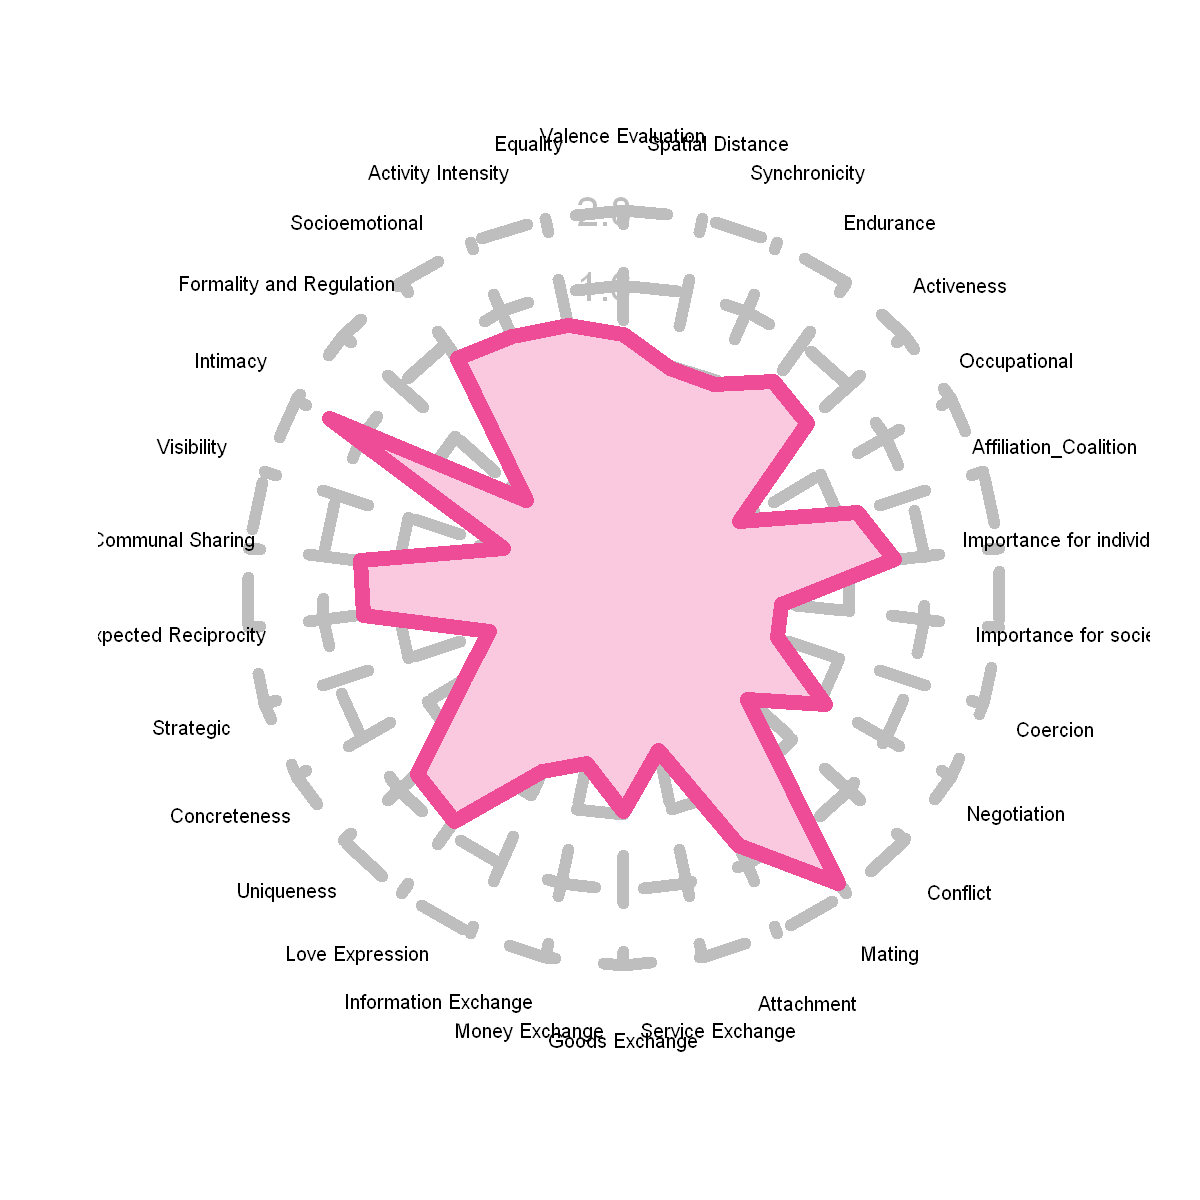

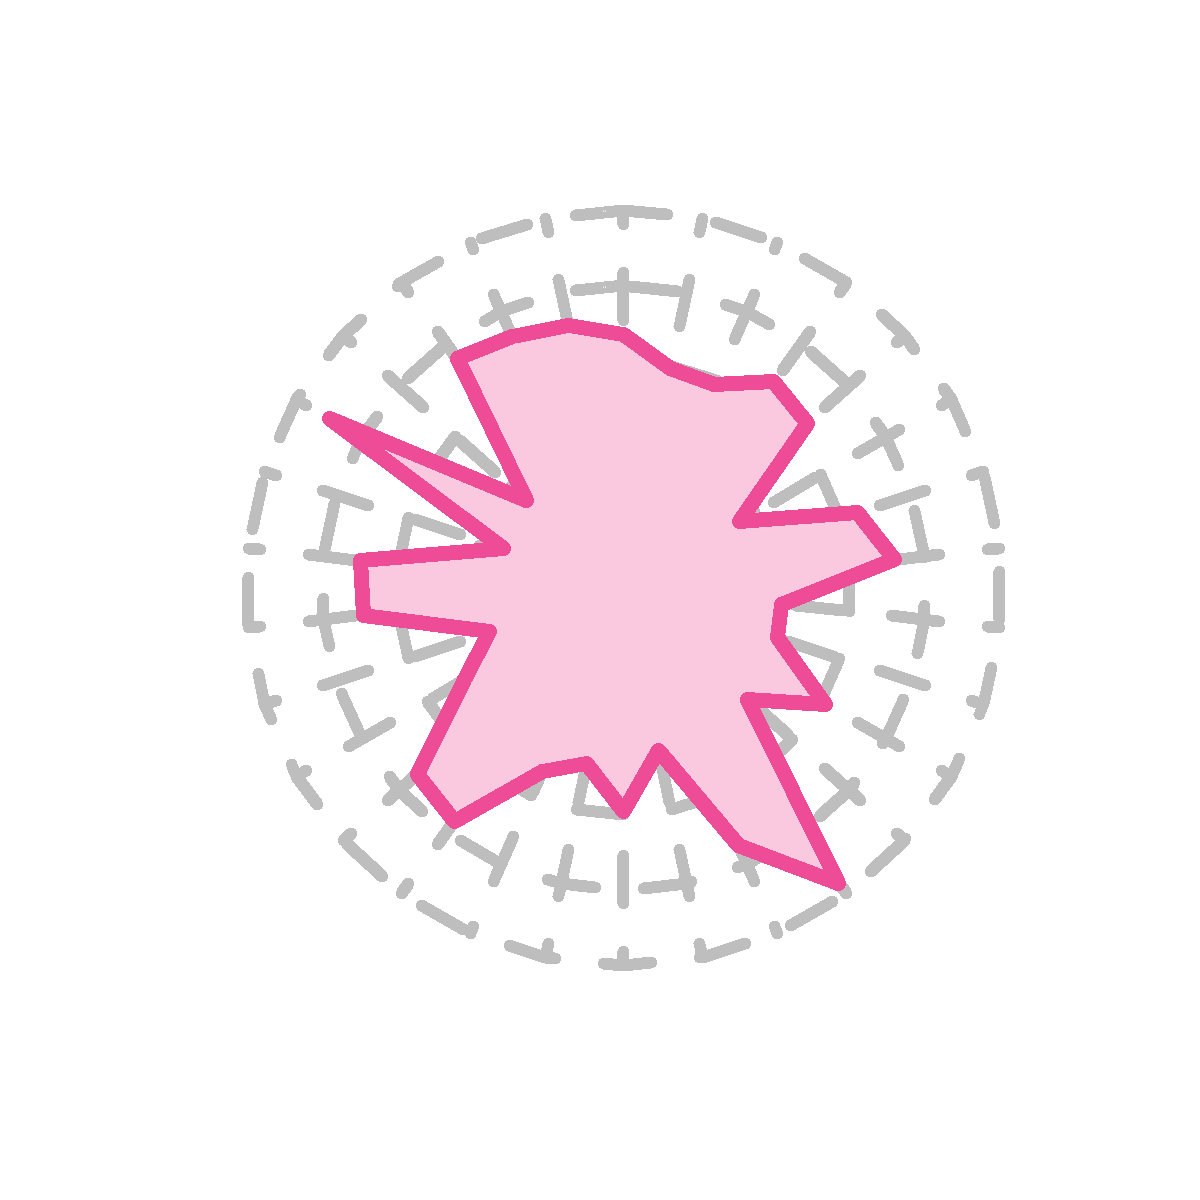

In [8]:
plot_cluster_30d_radar(cluster='Romantic',linecolor='#EE4C97',fillcolor='#FAC9E0')

#### Familial

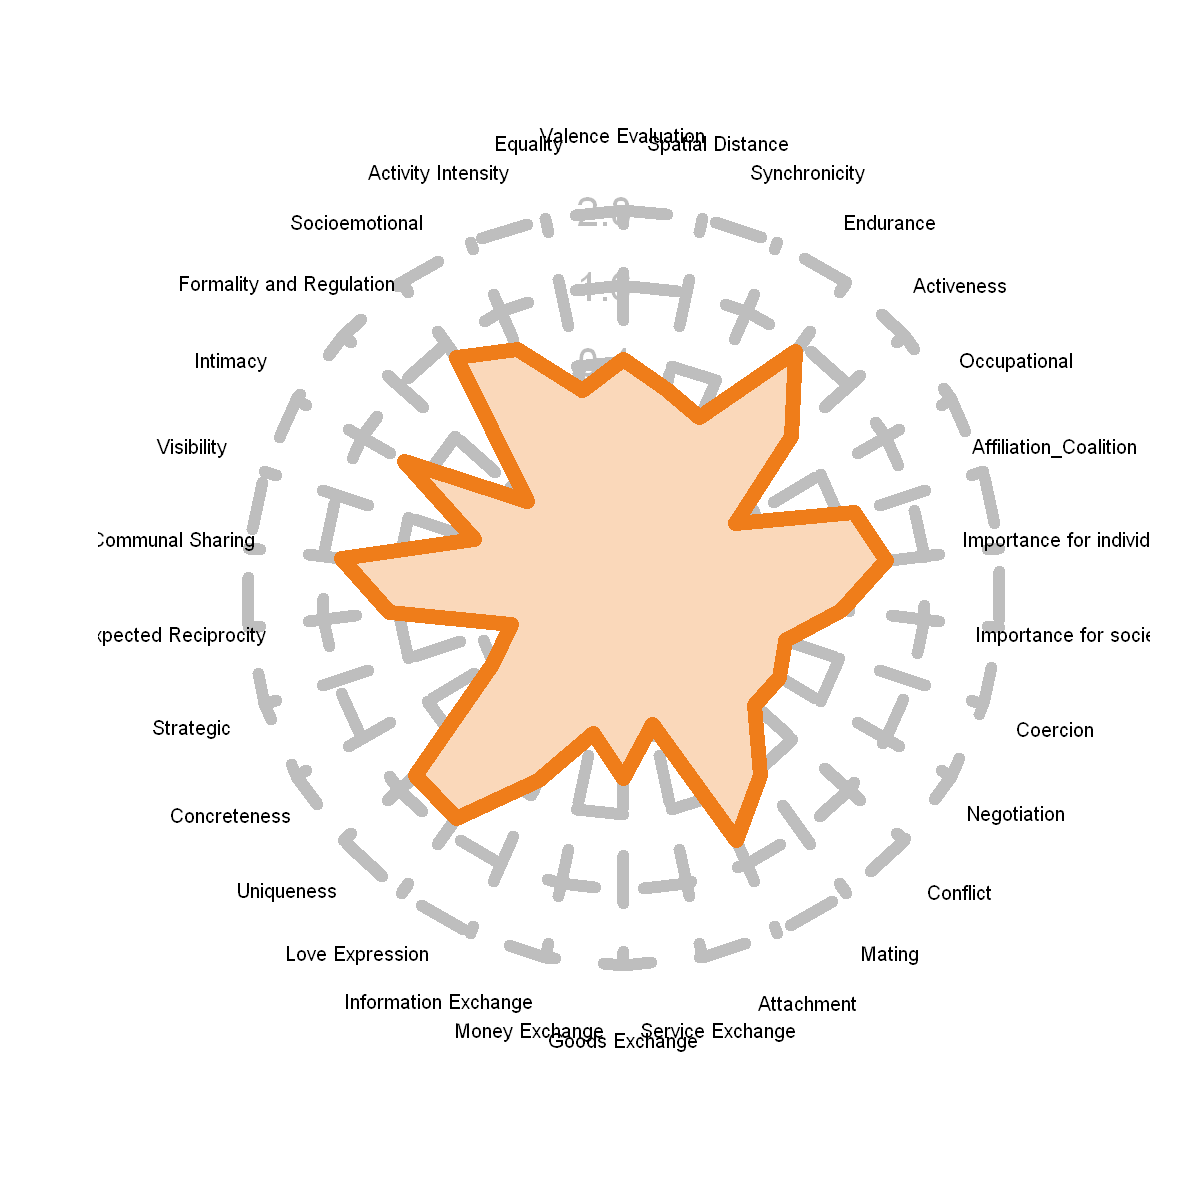

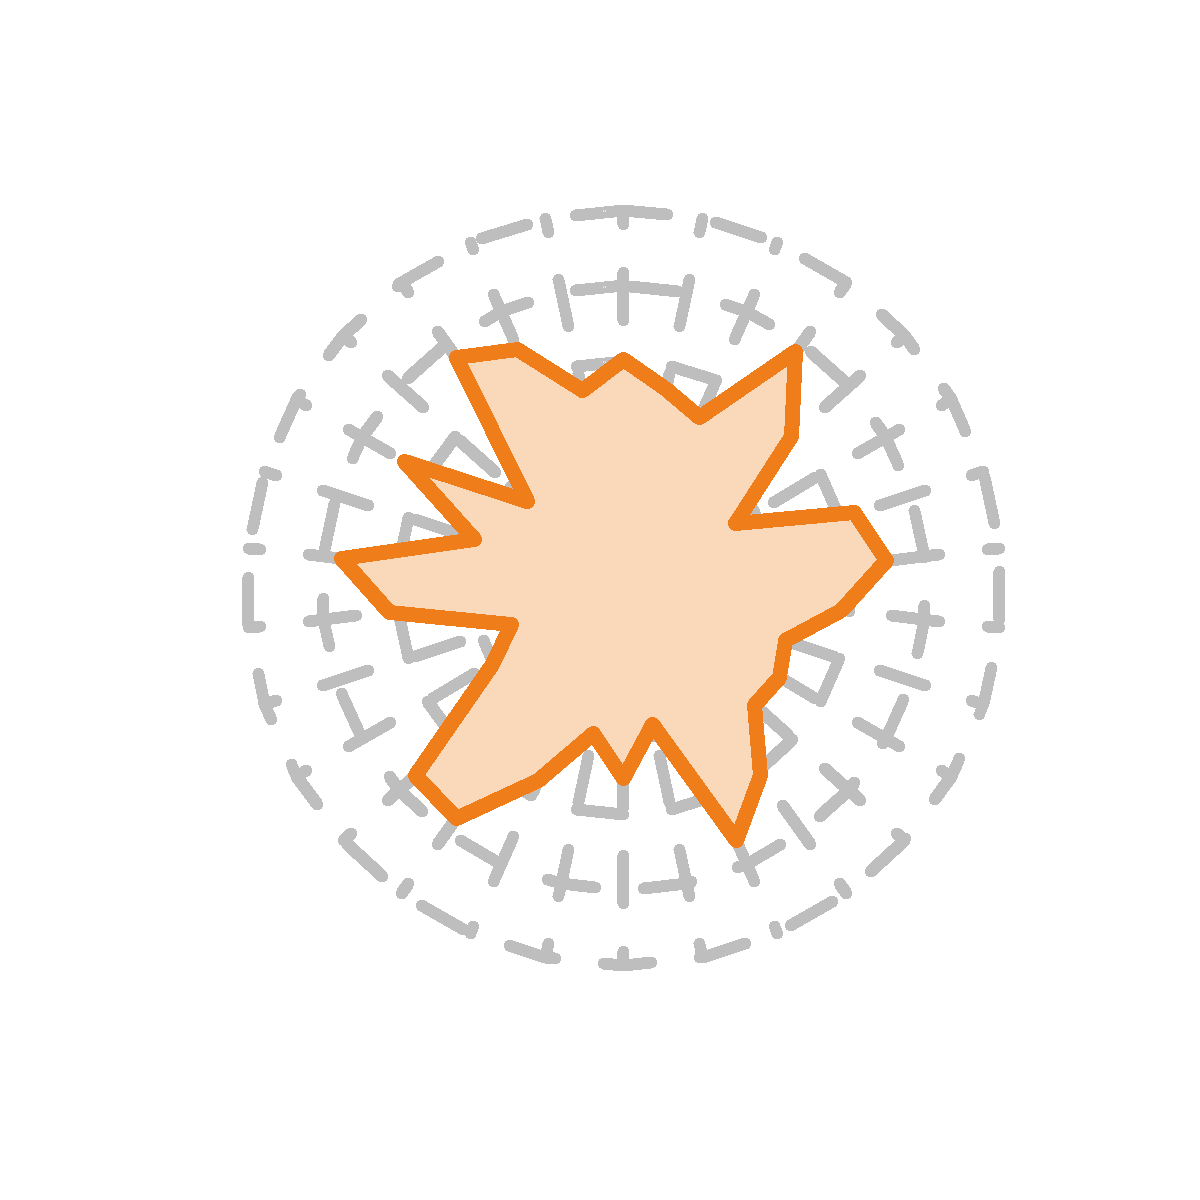

In [9]:
plot_cluster_30d_radar(cluster='Familial',linecolor='#EF7D1A',fillcolor='#FAD8BA')

#### Affiliative

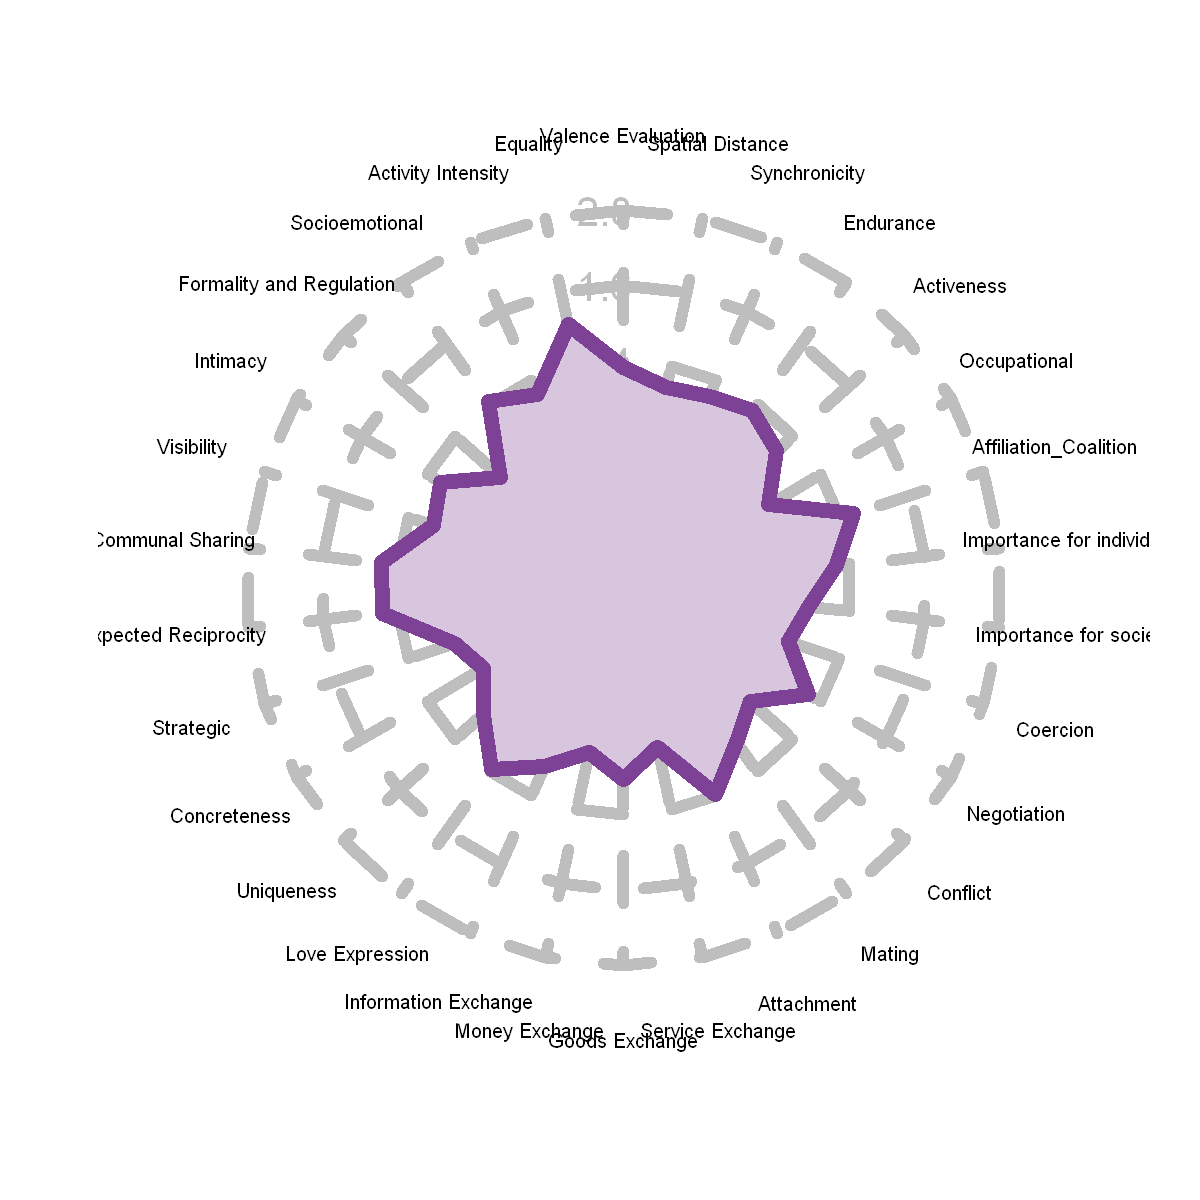

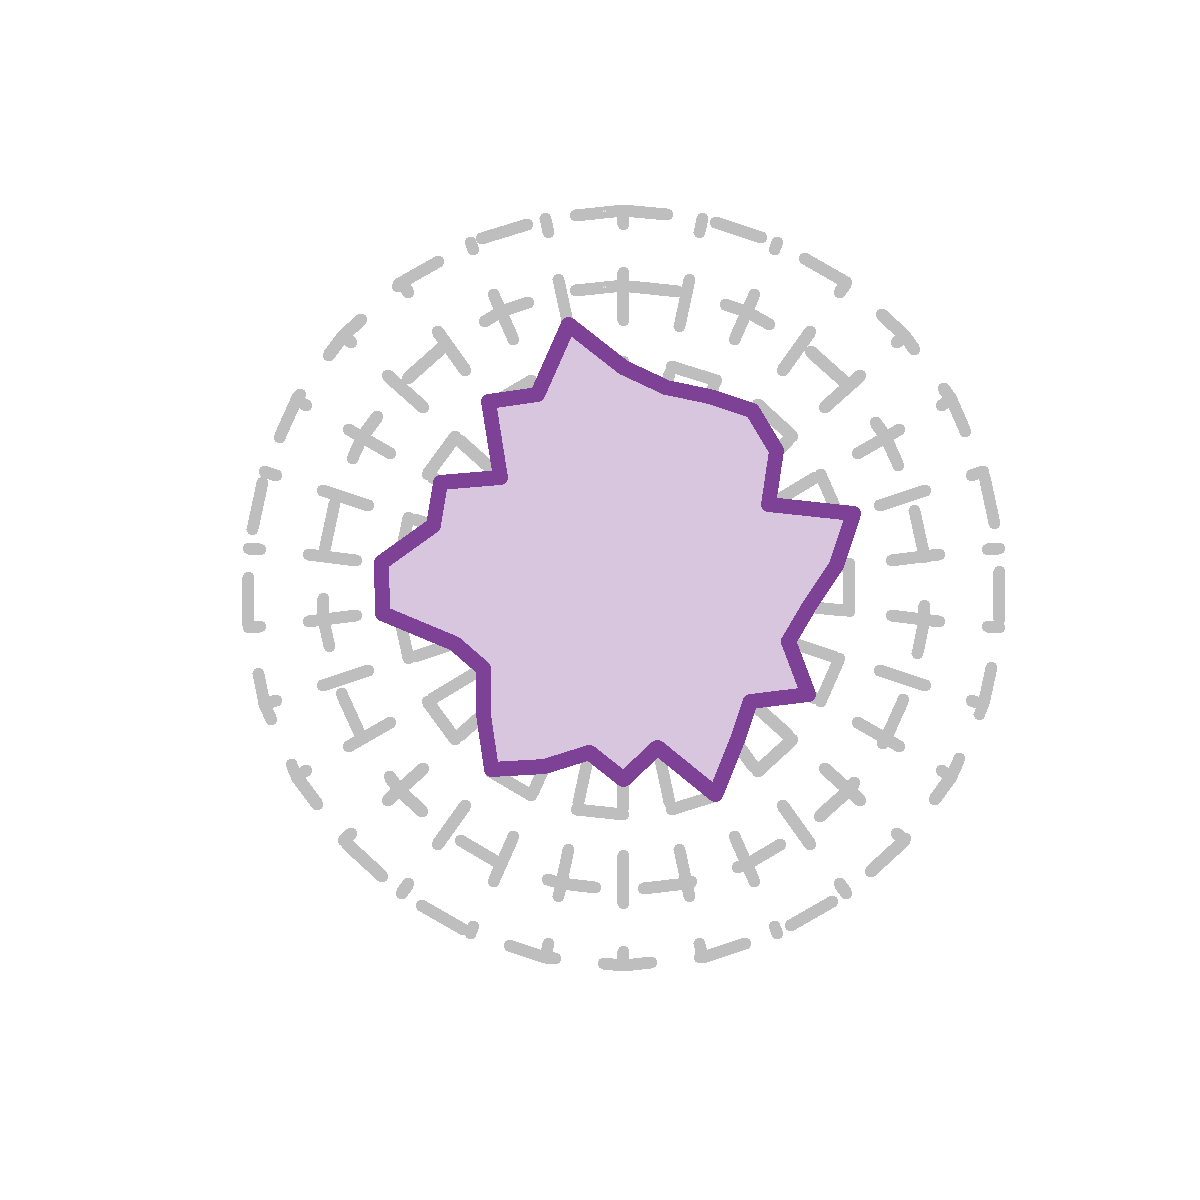

In [10]:
plot_cluster_30d_radar(cluster='Affiliative',linecolor='#7D4195',fillcolor='#D8C6DF')

#### Transactional

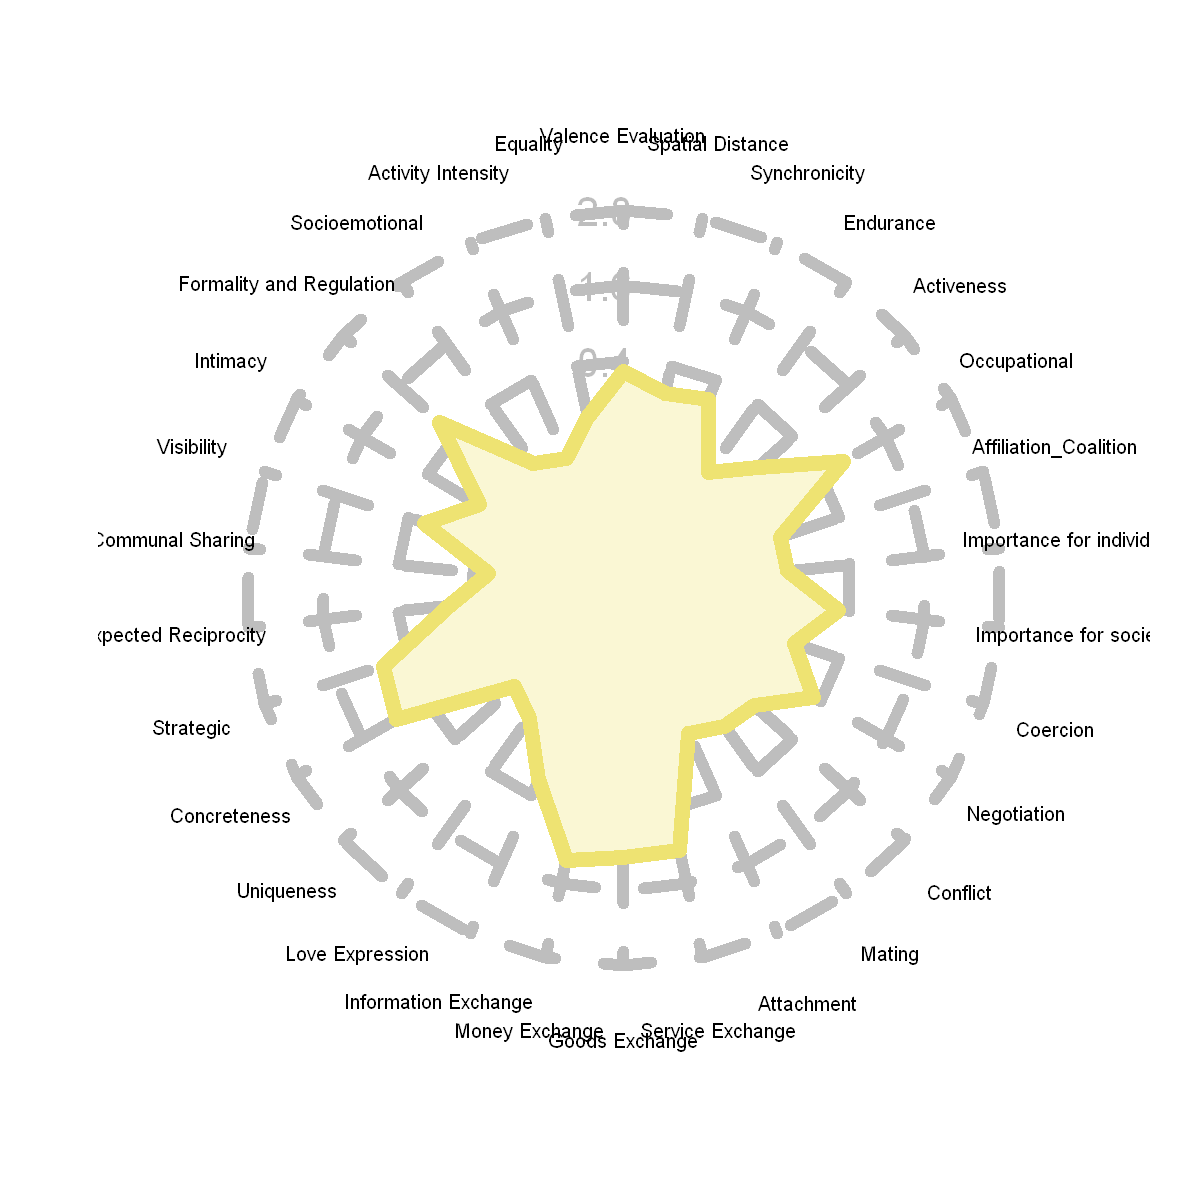

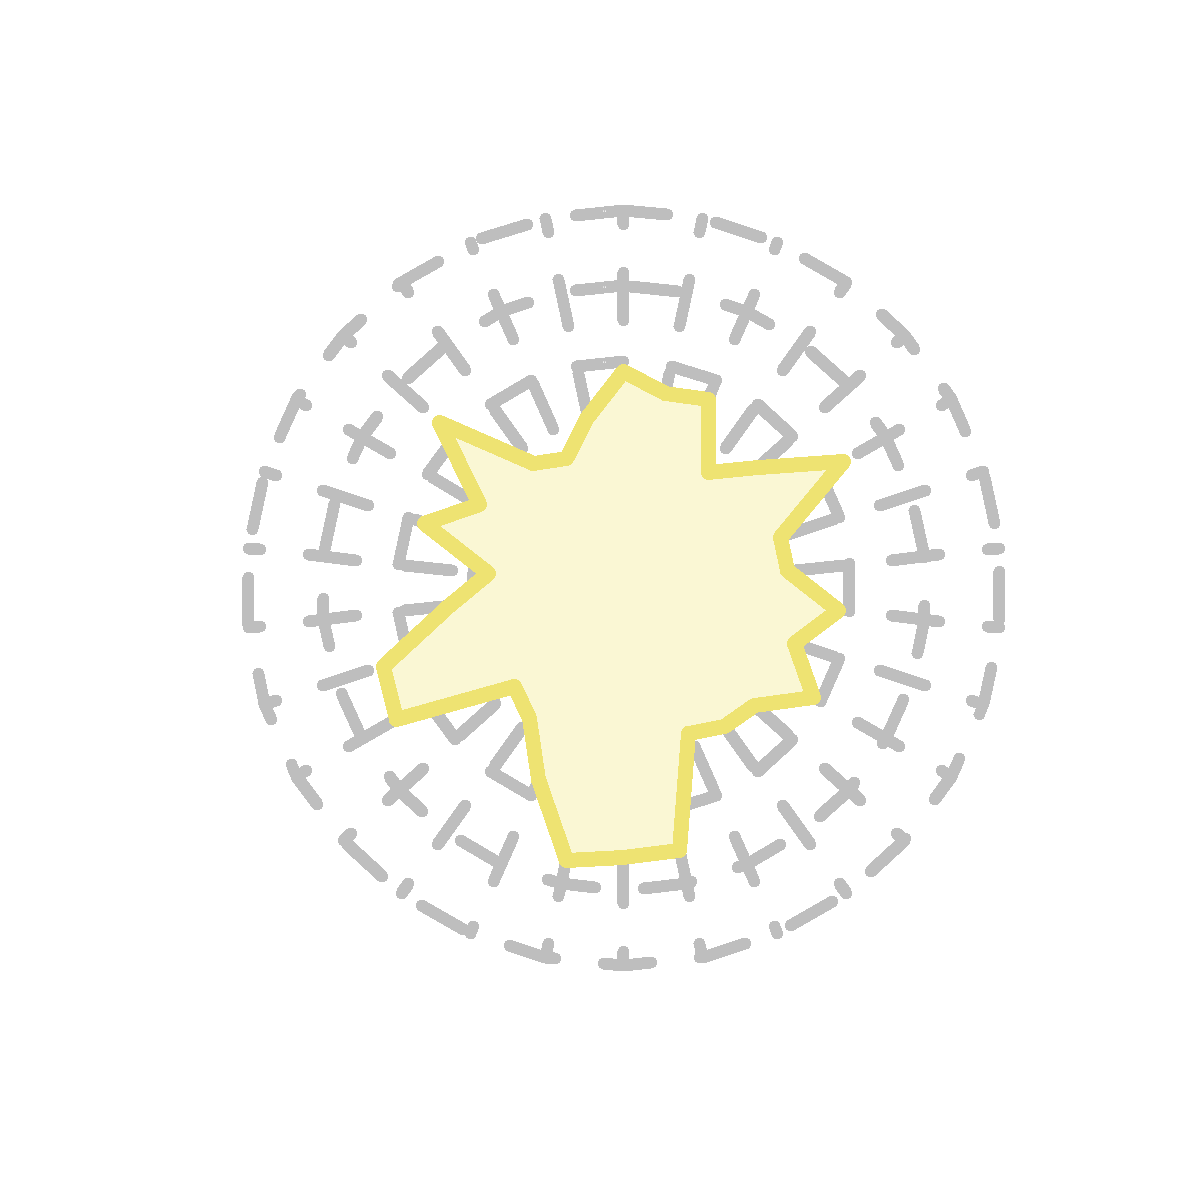

In [11]:
plot_cluster_30d_radar(cluster='Transactional',linecolor='#EEE372',fillcolor='#FAF7D4')

#### Power

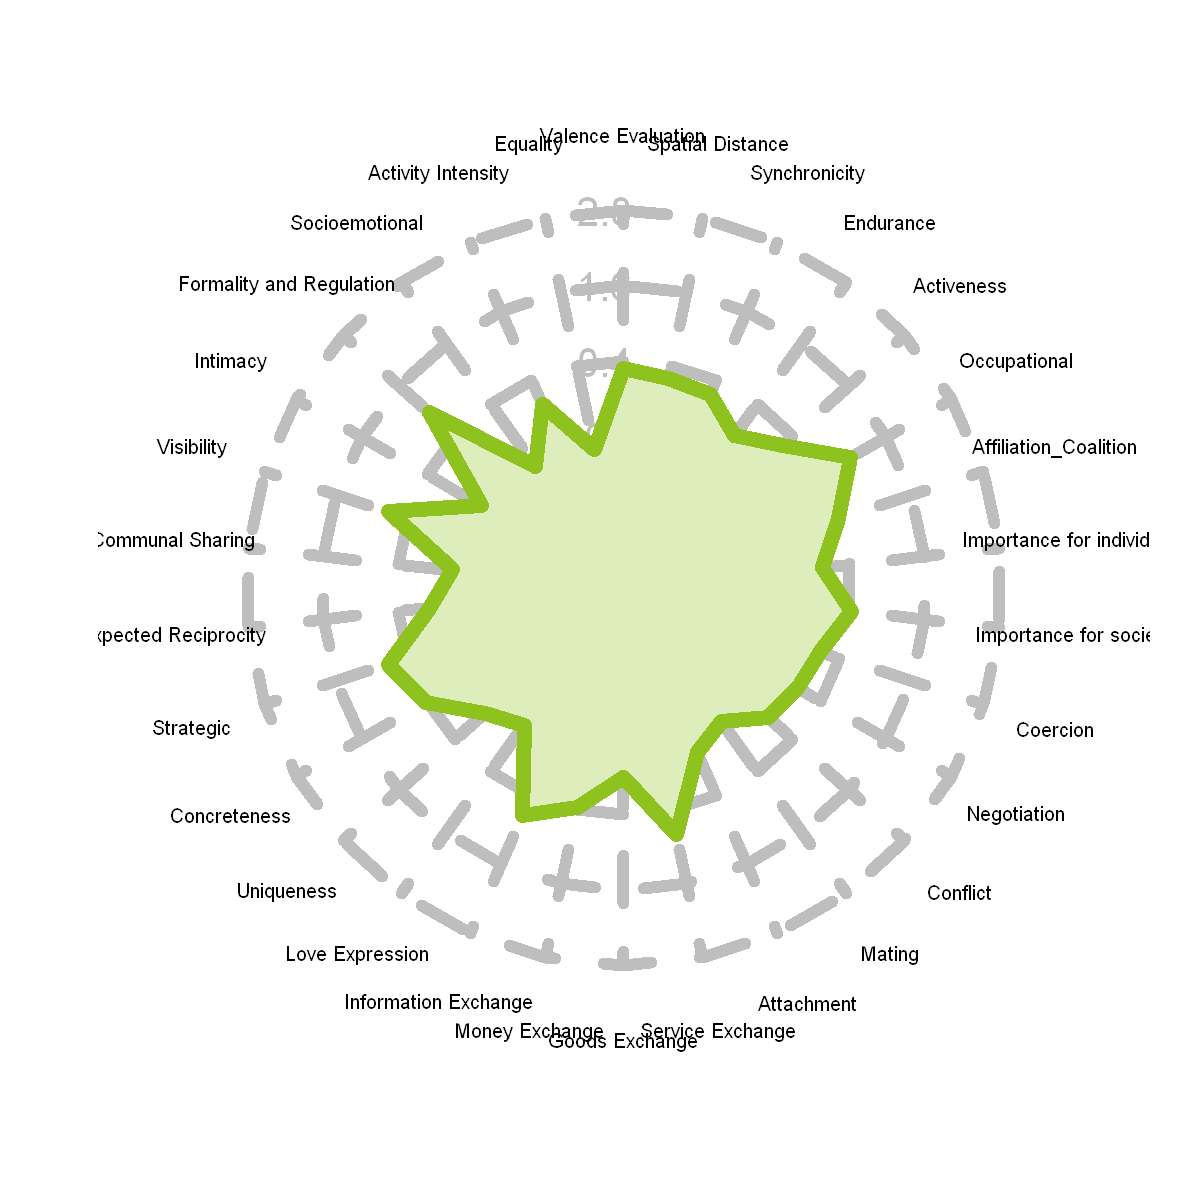

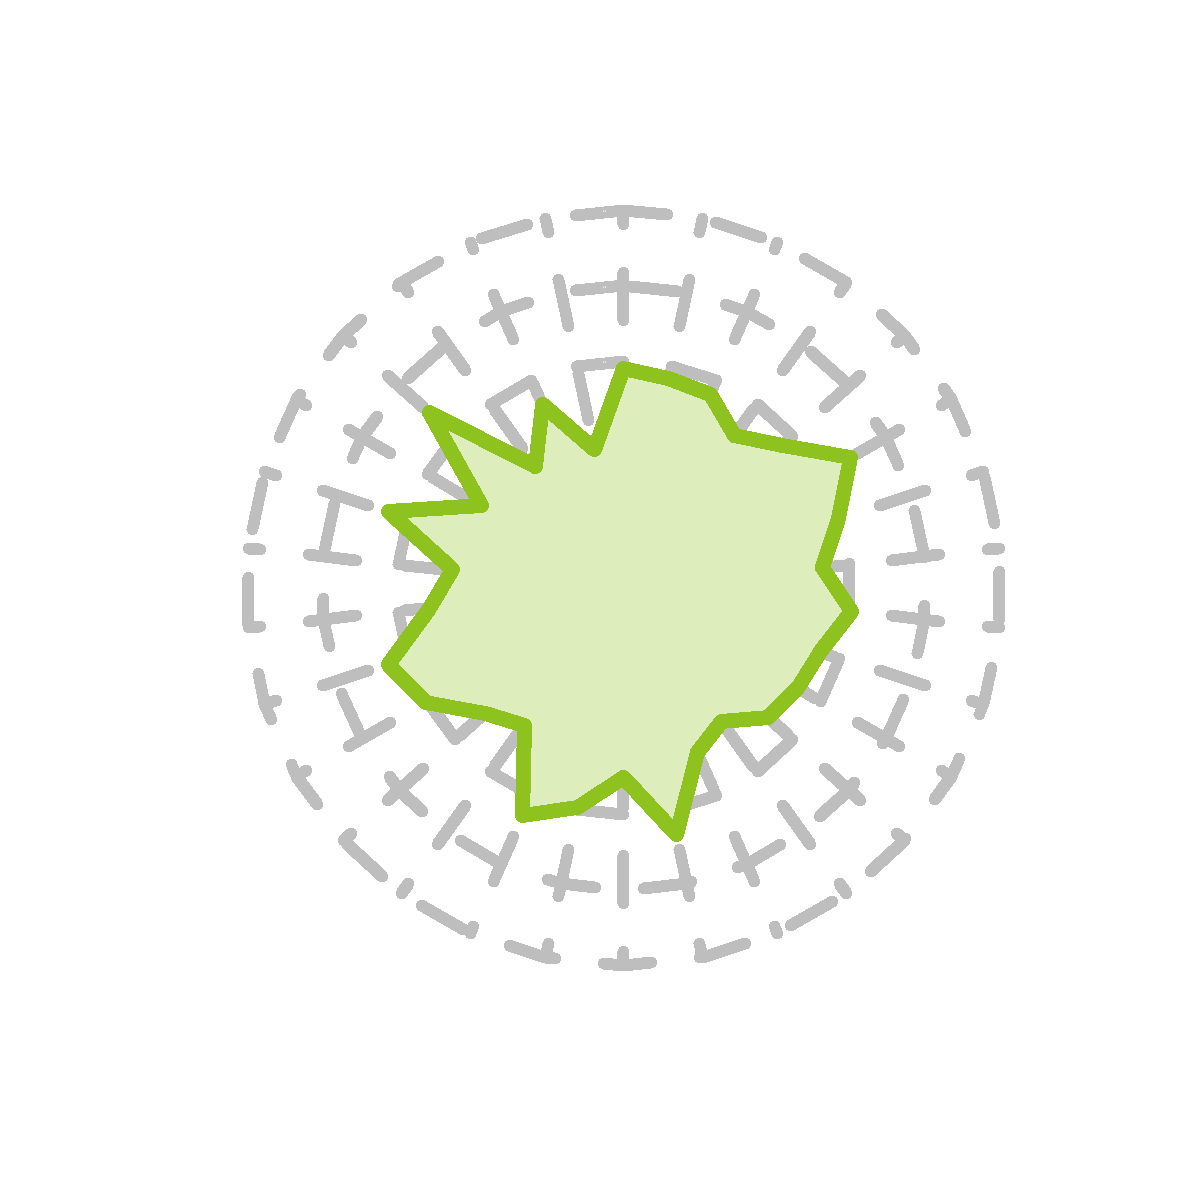

In [12]:
plot_cluster_30d_radar(cluster='Power',linecolor='#8EC21F',fillcolor='#DDEDBB')

#### Hostile

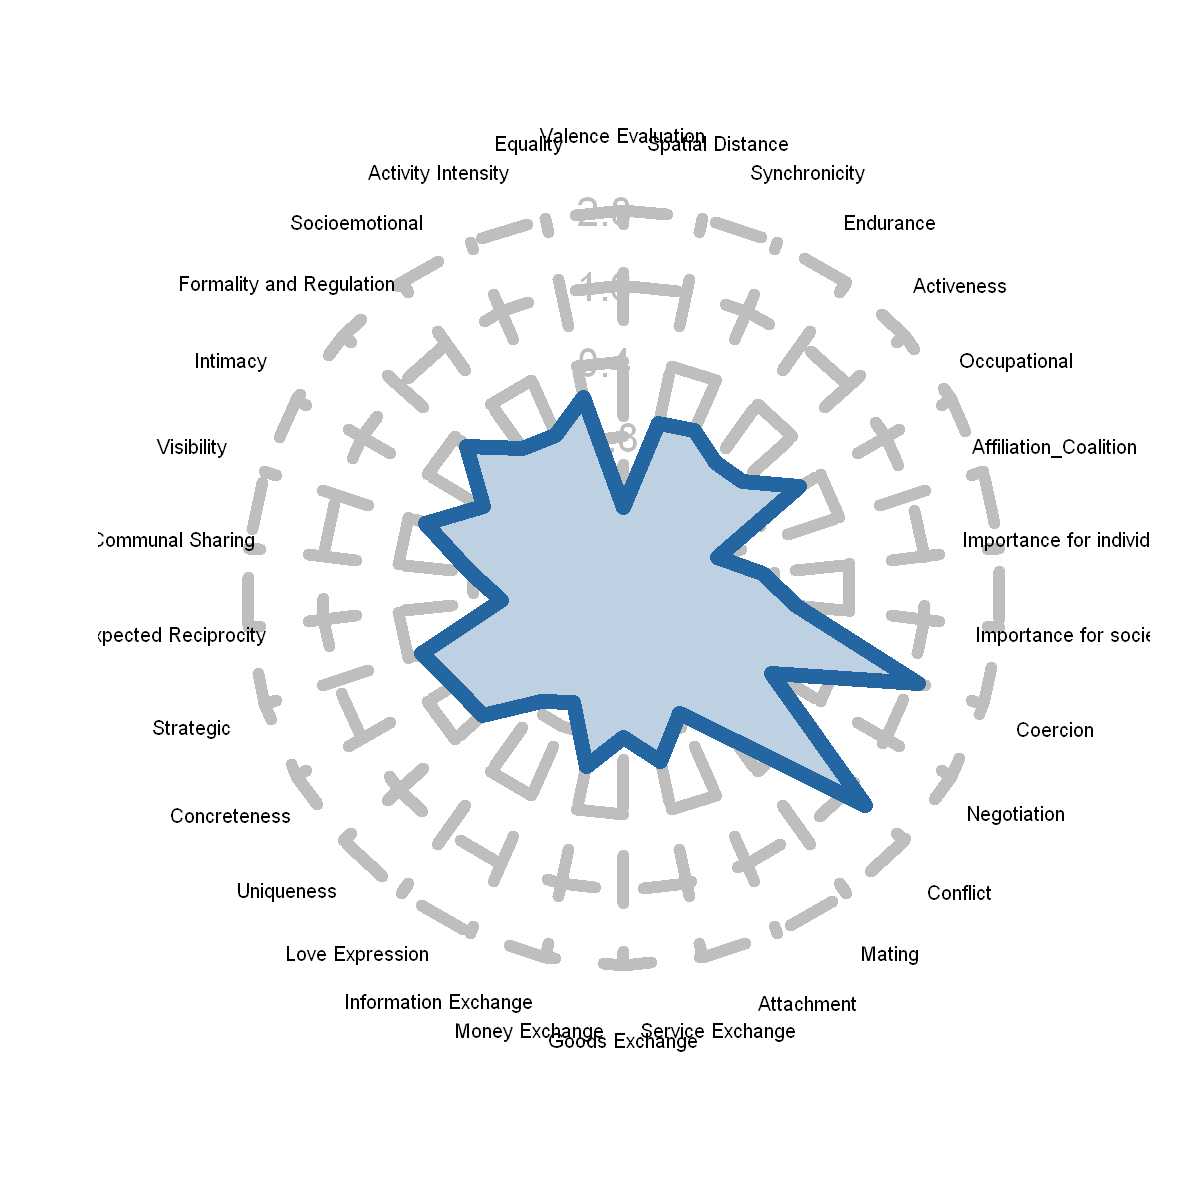

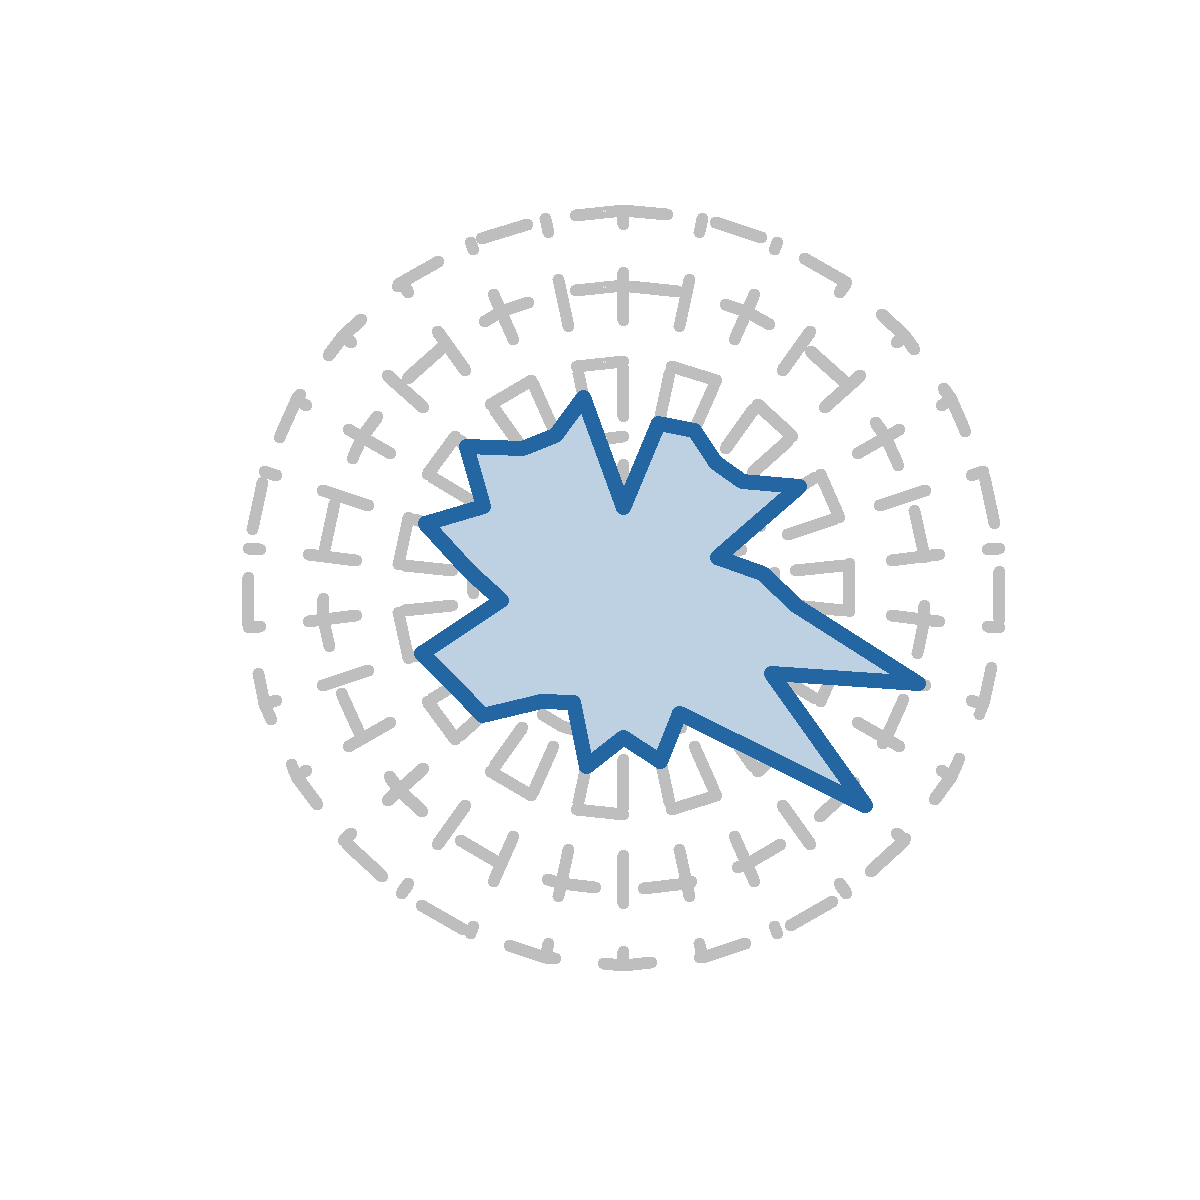

In [13]:
plot_cluster_30d_radar(cluster='Hostile',linecolor='#2466A2',fillcolor='#BDD1E3')

## HAC Labels in explicit task

In [15]:
library(ggplot2)
library(ggdendro) #get the details
library(dendextend) #change the plot

In [16]:
explicit_labels_df = read.csv('labels_explicit_deleted_mixed.csv')

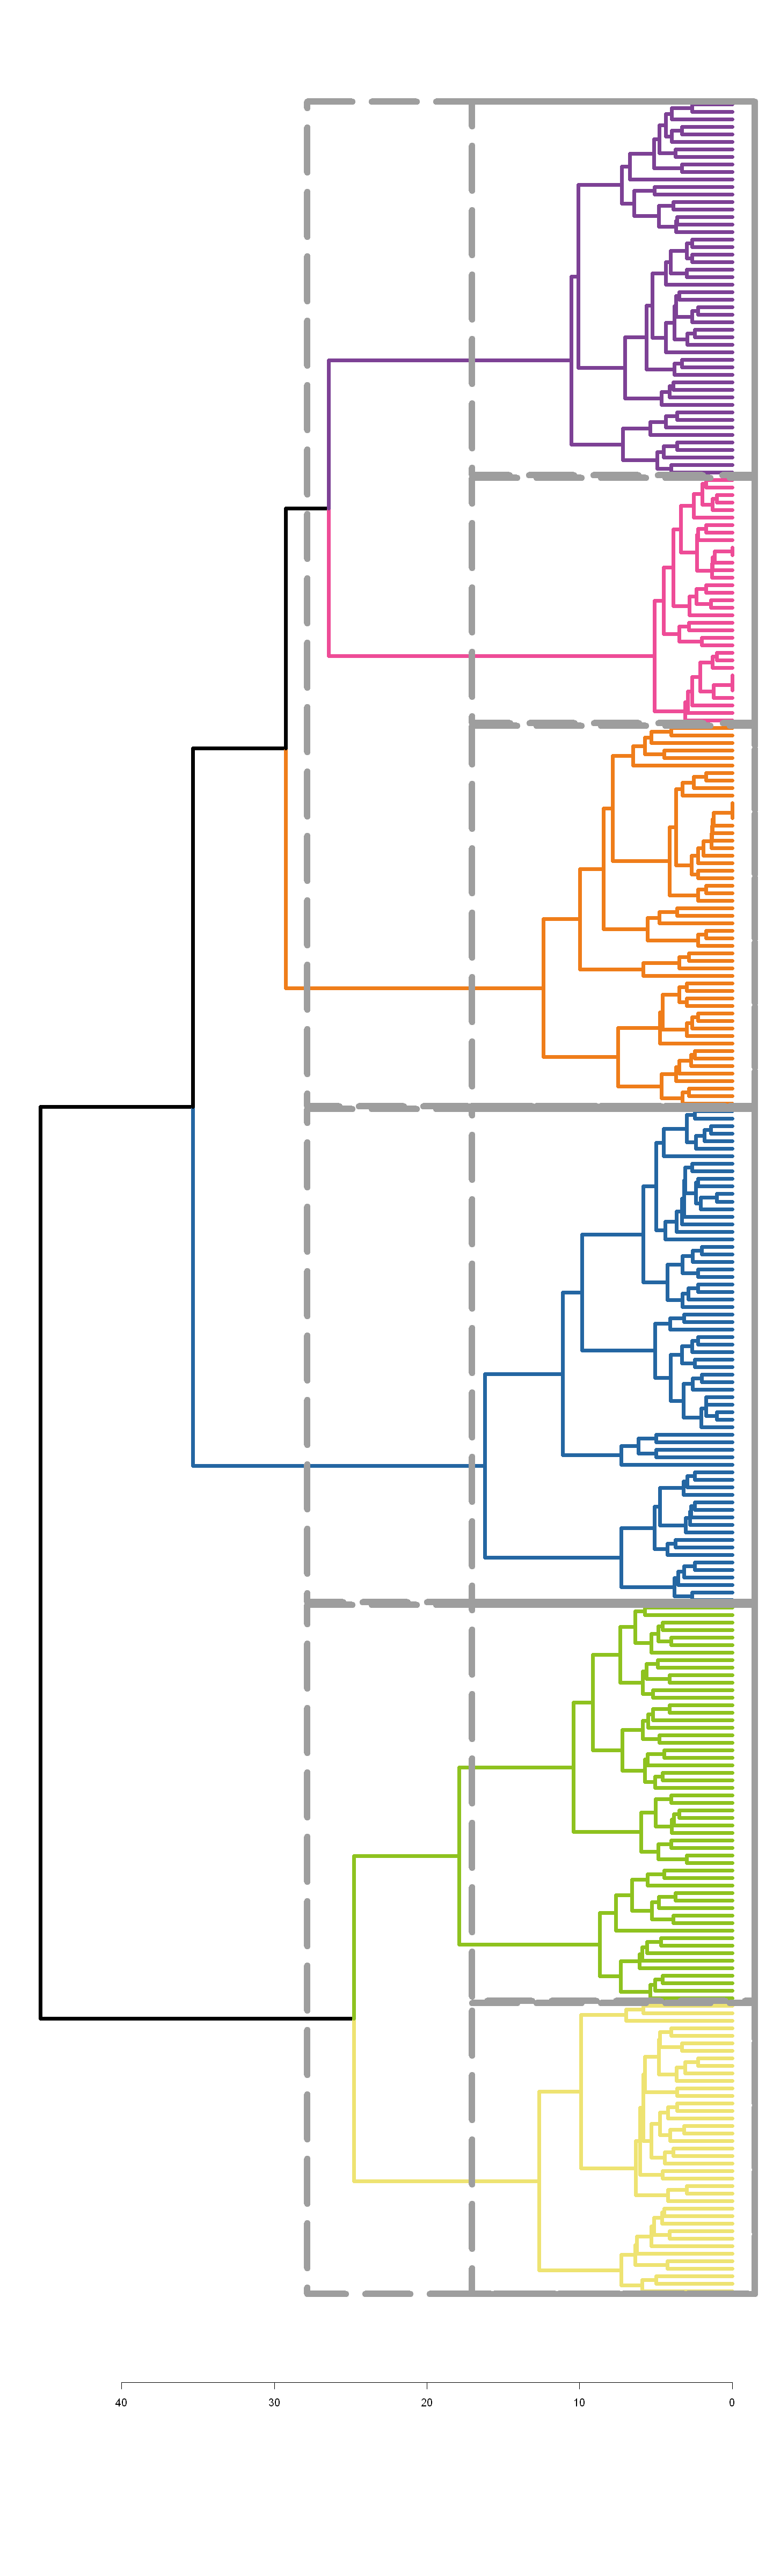

In [17]:
label_no = rep('',292)
options(repr.plot.width=12,repr.plot.height=40)
par(mar=c(15,1,1,1))  # Increase bottom margin to have the complete label
dend = explicit_labels_df %>% 
    select(-c(1)) %>% 
    dist(method = "euclidean") %>%
    hclust(method = "ward.D2") %>%
    as.dendrogram() %>% set("branches_k_color",k=6,
                            c("#EEE372","#8EC21F","#2466A2",'#EF7D1A',"#EE4C97","#7D4195"))%>%
                            # the order is reversed
                            #c("#7D4195","#EE4C97",'#EF7D1A',"#2466A2","#8EC21F","#EEE372")) %>%
                            #c("#FDAF16","#5BC4BF",'#2466A2',"#F25822","#EE4C97","#444DA3")) %>%
    #set("labels",label_true_order) %>%
    set("labels",label_no) %>%
    set("branches_lwd", 6)
plot(dend,horiz = TRUE)
dend %>% rect.dendrogram(k=6, border = 8, lty = 5, lwd = 10,horiz = TRUE)
dend %>% rect.dendrogram(k=3, border = 8, lty = 5, lwd = 10,horiz = TRUE)

## Wordcloud

In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
result_selected_df = pd.read_csv('output_data/label_analysis/HAC_results_final.csv',index_col=0)
mask = np.array(Image.open('output_data/label_analysis/circle.jpg'))
stopwords = {'a','b','e','of','p','w',
              'on','one','based','non','like','step','not','by','in','co','and','vs',
              'relationships','relationship','relation','relations','related'}

In [5]:
def Cluster_text(result_df,cluster_num,num,Cluster):
    HAC = list(result_df[result_df[cluster_num]==num].index)
    HAC = [i.split('_')[0] for i in HAC]
    HAC = [i.lower() for i in HAC]

    HAC_str = ''
    for i in HAC:
        HAC_str = HAC_str+' '+i 
        
    return HAC_str

### Romantic

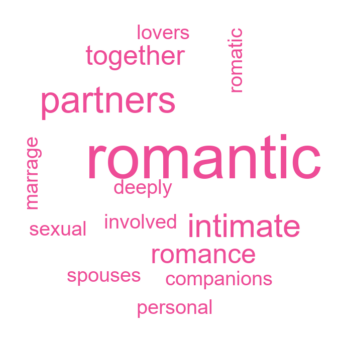

In [8]:
text = Cluster_text(result_selected_df,'cl_h6',4,'Romantic')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#EE4C97").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Familial

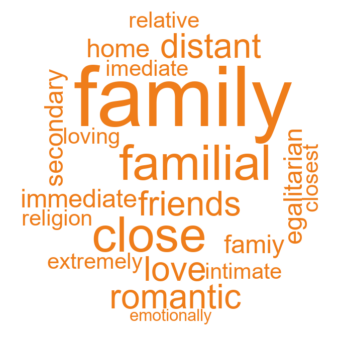

In [9]:
text = Cluster_text(result_selected_df,'cl_h6',1,'Familial')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#EF7D1A").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Affiliative

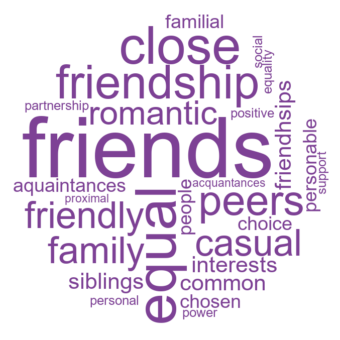

In [10]:
text = Cluster_text(result_selected_df,'cl_h6',3,'Affilive')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#7D4195").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Transactional

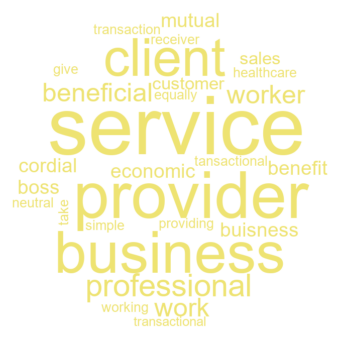

In [12]:
text = Cluster_text(result_selected_df,'cl_h6',5,'Transactional')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#EEE372").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Power

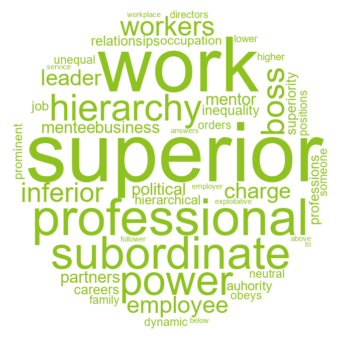

In [13]:
text = Cluster_text(result_selected_df,'cl_h6',0,'Power')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#8EC21F").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Hostile

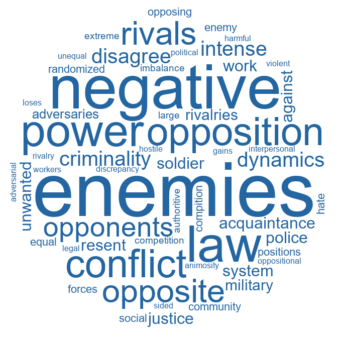

In [11]:
text = Cluster_text(result_selected_df,'cl_h6',2,'Hostile')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#2466A2").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Private

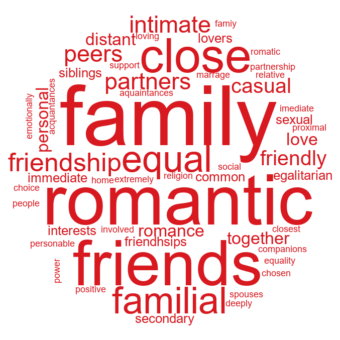

In [14]:
text = Cluster_text(result_selected_df,'cl_h3',0,'Private')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#D81920").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Public

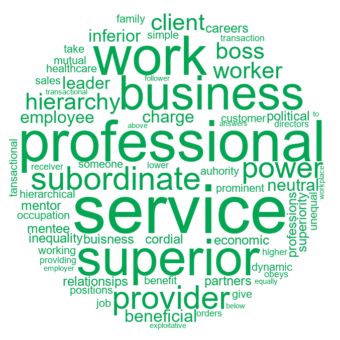

In [15]:
text = Cluster_text(result_selected_df,'cl_h3',1,'Public')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#03A652").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### mixed results

In [2]:
result_selected_df = pd.read_csv('output_data/label_analysis/HAC_results_first.csv',index_col=0)
mask = np.array(Image.open('output_data/label_analysis/circle.jpg'))
stopwords = {'a','b','e','of','p','w',
              'on','one','based','non','like','step','not','by','in','co','and','vs',
              'relationships','relationship','relation','relations','related'}

In [3]:
result_selected_df

,cl_h3,cl_h4,cl_h5,cl_h6,cl_h7,cl_h8
Boss_x,0,0,0,3,3,1
Coach/leader,0,0,0,3,3,1
Healthcare,1,1,1,0,6,6
Police /soldier,0,3,3,1,1,0
Religion_x,2,2,2,2,2,2
...,...,...,...,...,...,...
emotionally close,2,2,2,2,2,2
emotionally distant,0,0,0,3,3,1
rivalry,0,3,3,1,1,0
sexual/intimate relationships,0,0,0,5,5,5


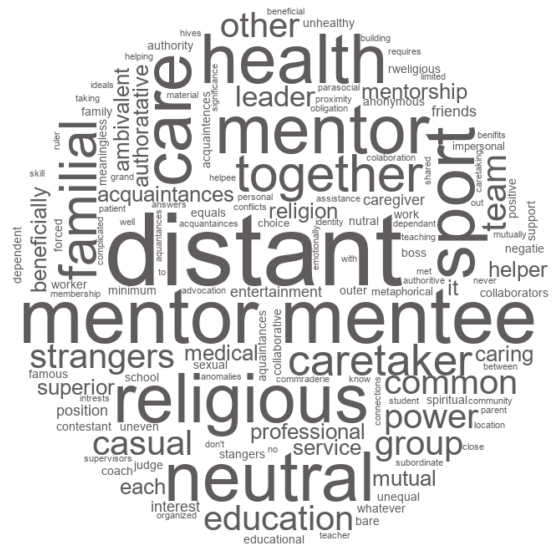

In [8]:
text = Cluster_text(result_selected_df,'cl_h8',1,'Mixed')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#605C5C").generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()